The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


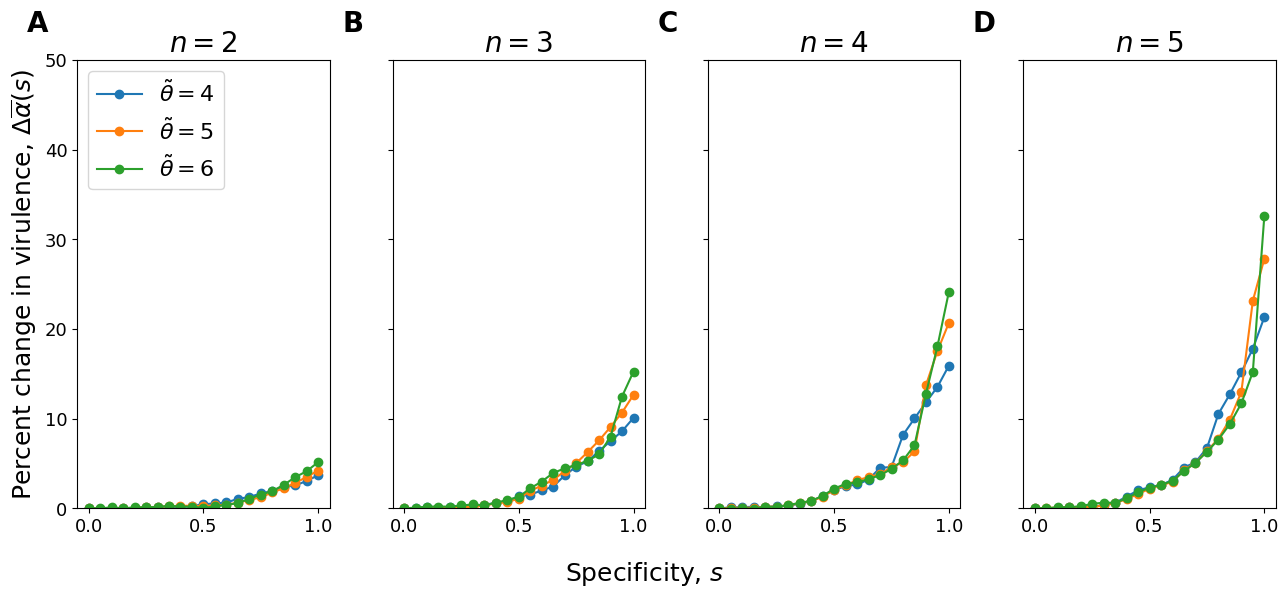

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('parameter_sweep.csv') 
unique_n = df['N'].unique()
fig, axes = plt.subplots(1, len(unique_n), figsize=(13, 6), sharey=True)

panel_labels = ['A', 'B', 'C', 'D']
legend_labels = {
    4: r'$\tilde{\theta} = 4$',
    5: r'$\tilde{\theta} = 5$',
    6: r'$\tilde{\theta} = 6$'
}

handles = []
labels = []

for idx, (ax, (n_val, dsub)) in enumerate(zip(axes, df.groupby('N'))):
    for theta_tilde, gsub in dsub.groupby('theta'):
        gsort = gsub.sort_values('s')
        baseline = gsort[gsort['s'] == 0]['mean_virulence'].values[0]
        percent_change = 100 * (gsort['mean_virulence'] - baseline) / baseline
        line, = ax.plot(gsort['s'], percent_change, marker='o', label=rf'$\tilde{{\theta}}={theta_tilde}$')

        if idx == 0:
            handles.append(line)
            labels.append(legend_labels[theta_tilde])
    
    ax.set_title(rf'$n={n_val}$', fontsize=20)
    ax.annotate(f'{panel_labels[idx]}',xy=(-0.2, 1.05), xycoords='axes fraction', fontsize=20, ha='left', va='bottom', fontweight='bold')
    ax.set_ylim(0, 50)
    ax.tick_params(axis='both', which='major', labelsize=13)

axes[0].set_ylabel(r'Percent change in virulence, $\Delta \overline{\alpha}(s)$', fontsize=18)
fig.supxlabel(r'Specificity, $s$', fontsize=18)

axes[0].legend(handles, labels, loc='upper left', fontsize=16)

plt.tight_layout()
plt.savefig('parameter_sweep.eps', dpi=500, bbox_inches='tight')
plt.show()